## (33) Text Processing Modules

### 1) html.parser

In [1]:
from html.parser import HTMLParser

In [8]:
class MyHTMLParser(HTMLParser):
    def handle_starttag(self, tag, attrs):
        print('Encountered a start tag : ' , tag)
    def handle_endtag(self, tag):
        print('Encountered an end tag :', tag)
    def handle_data(self, data):
        print('Encountered some data : ', data)
        
parser = MyHTMLParser()
parser.feed('<html><head><title>Test</title></head>'
            '<body><h1>parse me!</h1></h1></body></html>')

Encountered a start tag :  html
Encountered a start tag :  head
Encountered a start tag :  title
Encountered some data :  Test
Encountered an end tag : title
Encountered an end tag : head
Encountered a start tag :  body
Encountered a start tag :  h1
Encountered some data :  parse me!
Encountered an end tag : h1
Encountered an end tag : h1
Encountered an end tag : body
Encountered an end tag : html


In [10]:
class MyHTMLParser(HTMLParser):
    def handle_comment(self, data):
        print('Comment :', data)
    def handle_decl(self, data):
        print('Declaration :',data)

parser = MyHTMLParser()

In [12]:
# <Declaration 만났을때>
parser.feed('<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN">')

Declaration : DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN"


In [13]:
# <Documentation 만났을 때>
parser.feed('<!-- a comment parsing -->')

Comment :  a comment parsing 


In [31]:
from html.parser import HTMLParser
from html.entities import name2codepoint

class MyHTMLParser(HTMLParser):
    def handle_charref(self, name):
        if name.startswith('x'):
            c = chr(int(name[1:], 16))
        else:
            c = chr(int(name))
        print("Num ent : ", c)

    def handle_entityref(self, name):
        c = chr(name2codepoint[name])
        print('Named ent : ', c)

parser = MyHTMLParser()
print(parser.feed('&gt; &#63; &#x3B;'))

None


In [30]:
parser.feed('&#x3B')

### 2) beautiful soup

In [1]:
from bs4 import BeautifulSoup

with open('webtoon.html') as fp:
    soup = BeautifulSoup(fp)
    
soup = BeautifulSoup("<html>data</html>")

C:\Users\1\AppData\Local\Continuum\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\1\AppData\Local\Continuum\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


UnicodeDecodeError: 'cp949' codec can't decode byte 0xeb in position 237: illegal multibyte sequence

In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# print(soup.prettify()) : soup를 이쁘게 indet등이 정돈된 상태로 보여줌

html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title2"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

soup = BeautifulSoup(html_doc, 'html.parser')
print(soup)


<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title2"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body></html>


#### BeautifulSoup 클래스로 선언해준 soup 변수를 활용해서
- soup.title : title tag 전체를 보여줌
- soup.title.name : title태그라는 것을 보여주는 거 같음(태그의 이름) -> title로 보여줌
- soup.title.string : title 태그내에 저장된 data를 보여주는거 같음.
- soup.title.parent.name : title보다 상위에 있는 태그 이름 보여줌 -> head 보여줌
- soup.p : soup의 p태그 전체를 보여줌
- soup.p['class'] : p태그의 class로 선언된게 무엇인지 리스트 형태로 보여줌
- soup.a : a태그 전체를 보여줌

In [3]:
print(soup.title)
print()
print(soup.title.name)
print()
print(soup.title.string)
print()
print(soup.title.parent.name)
print()
print(soup.p)
print()
print(soup.p['class'])
print()
print(soup.a)

<title>The Dormouse's story</title>

title

The Dormouse's story

head

<p class="title2"><b>The Dormouse's story</b></p>

['title2']

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>


#### soup.find_al()l / find(xx = 'xx')
- soup.find_all('a') : a태그들을 모두 찾아줌
- soup.find(id='link3') : id='link3'을 포함한 태그를 찾아줌

In [4]:
soup.find_all('a')
soup.find(id='link3')

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

### Extracting all the URLs found within a page 'a' tags

In [38]:
for link in soup.find_all('a'):
    print(link.get('href'))
    
print()
print(soup.get_text())

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


The Dormouse's story

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



#### find(), find_all() 함수의 옵션 : limit / argument별로 찾기 / (태그, class="")
- find_all 함수는 1개의 list가 Return된다는 것이 중요함!!

In [54]:
soup.find_all('title')

[<title>The Dormouse's story</title>]

In [56]:
soup.find_all(id='link2')

[<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>]

In [57]:
soup.find_all("a", class_='sister')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [63]:
soup.find_all(string='Elsie')

['Elsie']

In [52]:
# find_all 함수의 limit옵션은 몇개까지 보여줄 지 선정하는 것이라고 생각하면 된다.
soup.find_all('a', limit = 1)
# soup.find('title')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>]

#### Web Scraping Example

In [157]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

class HTMLTableParser:
    def parse_url(self, url):
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'lxml')
        return [(self.parse_html_table(table)) for table in soup.find_all('table')]
    def parse_html_table(self, table):
        n_columns = 0
        n_rows = 0
        column_names = []
        for row in table.find_all('tr'):
            td_tags = row.find_all('td') # 모든 td들이 td_tags에 저장될 것이고 td_tags의 len() td의 갯수가 된다.
            if len(td_tags) > 0:
                n_rows += 1# for문 한번씩 돌때마다 row갯수가 하나씩 올라 가는 것임
                if n_columns == 0:
                    n_columns = len(td_tags) 
                    # row에 들어있는 data(td) 갯수만큼 열이 있는 것이니깐 열의 갯수라 할 수있음
                    # col갯수는 for문돌면서 count할 필요없음
            th_tags = row.find_all('th')
            if len(th_tags) > 0 and len(column_names) == 0:
                for th in th_tags:
                    column_names.append(th.get_text())
        #column 갯수랑 column의 Header갯수가 일치하지않을때 보호해주는 장치임
        if len(column_names) > 0 and len(column_names) != n_columns: 
            raise Exception('Column titles donot match the number of columns')
        # Exception Error를 불러일으킨다는 뜻이다.
            
        #make DataFrame
        columns = column_names if len(column_names) > 0 else range(0, n_columns)
        # column_names가 있으면(길이가 0보다 크다로 표현함) 그대로 쓰고 없으면 column갯수대로 번호로 써준다
        df = pd.DataFrame(columns = columns, index = range(0, n_rows))
        row_marker = 0 

        # 핵심! DataFrame을 채워나가는 가정
        for row in table.find_all('tr'):
            column_marker = 0
            columns = row.find_all('td')
            # columns에는 table_data들이 오게됨
            for column in columns:
                df.iat[row_marker, column_marker] = column.get_text() 
                #.iat는(index번호와, column순서 번호) / 단순히(행,열) 이라고 생각하자
                column_marker += 1
            if len(columns) > 0: # 질문! 이거는 거의 항상 옳은데 왜 써준지 모르겠음! if문없이 그냥 써주면 안되나?
                row_marker += 1

        for col in df: # 질문! df를 for문으로 돌리면 column들이 나오나????
            try:
                if col == 'Rank':
                    continue
                df[col] = df[col].astype(float)
            except ValueError:
                pass
        return df
                        

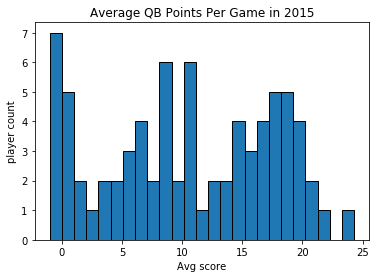

In [158]:
if __name__ == '__main__':
    url = 'https://www.fantasypros.com/nfl/reports/leaders/qb.php?year=2015'
    
    hp = HTMLTableParser()
    table = hp.parse_url(url)[0] # [0]은 url에서 내가 원하는 테이블은 첫번째 테이블임을 말해주는 것임
    plt.figure()
    avg = table['Avg'].values
    plt.hist(avg, bins=25, histtype='bar', ec='black')
    plt.title('Average QB Points Per Game in 2015')
    plt.xlabel('Avg score')
    plt.ylabel('player count')
    plt.show()


### 3) Regular Expression : 정규표현식
- 특정한 규칙을 가진 문자열의 집합을 표현하는데 사용하는 형식 언어
- 표준 라이브러리임(re module) : import re 해서 사용할 수 있다.
- https://regex101.com/ : 매우 유용한 정규표현식 관련 사이트임.

In [102]:
import re

__Example Code with Sub()__

1)정규표현식을 사용 안한 경우

In [161]:
data = '''
park 800905-1049118
kim 700905-1059119
'''

result = []
for line in data.split("\n"):
    word_result = []
    for word in line.split(" "):
        # park이나 kim같은 성은 if문에 안걸리고 if문 밖의 word_result에 담긴다. 
        # 주민번호는 if문에 걸려서 format이 한번 변경된 후에 word_result에 담긴다.
        if len(word) == 14 and word[:6].isdigit() and word[7:].isdigit():
            word = word[:6] + "-" + "*******"
        word_result.append(word)
    print(word_result)
    result.append(" ".join(word_result)) #중간에 공백을 넣어주고 두 문자열을 합친다는 뜻
print('\n'.join(result)) # 중간에 \n을 넣고 두문자열을 합친다는 뜻


['']
['park', '800905-*******']
['kim', '700905-*******']
['']

park 800905-*******
kim 700905-*******



2) 정규표현 식을 사용한 경우 SIMPLE!!!

In [200]:
 data ="""
 park 800905-1049118
 kim  700905-1059119
 """

pat = re.compile('(\d{6})[-]\d{7}') 
# 이 식자체가 정규 표현식을 적용할 수 있는 모델(?)을 만든거라 생각하자.
# (\d{6}) 괄호로 묶어줘야지 밑에서 \g<1>과 연동해서 쓸 수 있다.(group1이라고 생각하자.)
print(pat)
print()
print(pat.sub('\g<1>-*******', data))

print(re.sub('(\d{6})[-]\d{7}', '\g<1>-*******', data))

re.compile('(\\d{6})[-]\\d{7}')


park 800905-*******
kim  700905-*******


park 800905-*******
kim  700905-*******



#### 정규식을 이용한 문자열 검색
- 정규식과 일치하는 경우가 있을때 match object return하는 경우 match() / search() / findall() / finditer()
- Method list : group(), start(), end(), span()

1) match()

In [208]:
p = re.compile('[a-z]+')
m = p.match('string goes here') # 공백 만나기전인 string까지가 값이 된다.
print(m) # p.match하면 p에 대한 match조건에 대해서 어디서부터 어디까지가 매치되는지 매치되는 문자열은 어디까지인지 등
        # 다양한 정보가 담겨서 나온다
if m:
    print('Match found :',m.group())
else:
    print('No match')
    
print('group() :', m.group())
print('start() :', m.start())
print('end() :', m.end())
print('span() :', m.span())

<_sre.SRE_Match object; span=(0, 6), match='string'>
Match found : string
group() : string
start() : 0
end() : 6
span() : (0, 6)


2) search

In [209]:
text = 'This is my First Regular Expression Program'
patterns = ['first', 'that', 'progoram']

for pattern in patterns:
    print('Looking for "%s", in "%s" ->'%(pattern, text), end=' ')
    if re.search(pattern, text, re.I): 
        # text에 대해서 pattern이 있는지 찾아본다는 뜻! Trune면 Match! False 면 No match
        print('Match!')
    else:
        print('No match')

Looking for "first", in "This is my First Regular Expression Program" -> Match!
Looking for "that", in "This is my First Regular Expression Program" -> No match
Looking for "progoram", in "This is my First Regular Expression Program" -> No match


3) findall()

In [213]:
line = 'Python Orientation course helps professionals fish best opportunities'

print(re.findall(r"\bp[\w]*", line))
print()
print(re.findall(r'\b\w{5}\b', line))
print()
print(re.findall(r'\b\w{4,6}\b', line))
print()
print(re.findall(r'\b\w{13,}\b', line))
print()

string = 'Python java c++ perl shell ruby tcl c c# p'
print(re.findall(r"\bc[\W+]*", string, re.I))
print(re.findall(r"\bp[\w]*", string, re.I))

['professionals']

['helps']

['Python', 'course', 'helps', 'fish', 'best']

['professionals', 'opportunities']

['c++ ', 'c ', 'c# ']
['Python', 'perl', 'p']


4) finditer()

In [214]:
string = 'Python java c++ perl shell ruby tcl c c#'
it = re.finditer(r"\bc[(\W\s)]*", string)
for match in it:
    print(" '{g}' was found between the indices {s}".format(g=match.group(), s=match.span())) # 주민등록번호 예제에서 쓰인 g<1>과 헷갈리지 말자.

 'c++ ' was found between the indices (12, 16)
 'c ' was found between the indices (36, 38)
 'c#' was found between the indices (38, 40)
